### Custom Filters
---

Most filters have one of the four standard frequency responses: low-pass, high-pass, band-pass or band-reject. This new module will provide a  general method of designing digital filters with an arbitrary frequency responsew which are  tailored to the needs of your particular application. DSP excels in this area, solving problems that are far above the capabilities of analog electronics.

**DETRENDING**

Detrending is removing a trend from a time series; a trend usually refers to a change in the mean over time. When you detrend data, you remove an aspect from the data that you think is causing some kind of distortion. For example, you might detrend data that shows an overall increase, in order to see subtrends. Usually, these subtrends are seen as fluctuations on a time series graph.
![](.\img1\dt.png)

Mathematically, FFT extracts the components of a signal of finite length.Signal analysis the FFT is used on signals of infinite 
length.  So, when we chop up the signal into finite-length segments,  you are making an approximation.  Detrending the signal makes this  approximation better and more accurate : the FFT acts as if it's signal wraps around from  the Nth data point to the first ,So if there's a big mismatch at that  point, the algorithm will be able to guage  signal components from the discontinuity.  But  the discontinuity isn't in the original signal ,it was created when we splited it into discrete samples with a given sampling rate .We will use Detrending in an effort to make our approximation of the given signal as good as possible.Ultimately this is the same reason that the data is usually windowed,  although We will be addressing  different problems with windowing vs detrending.Similarly, if you have a visible trend like a linear trend, that is a slow variation of the signal, then your spectrum will be filled with  by its low frequency components the same way as with a mere DC component. So, provided you know this trend is not significant for your purpose, you may want to remove it beforehand, to better highlight other, higher-frequency, more interesting features of your signal depending upon our application.


---
##### Python Program to iimplement detrending of signal 

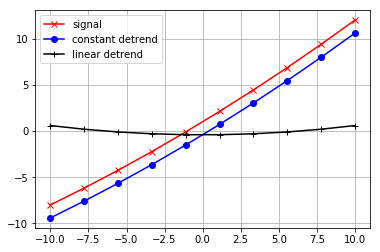

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# creation of Discrete points ( from 10 to 10 of 20 values )
t = np.linspace(-10,10,10)
y = 1 +t+0.01*t**2
yconst = signal.detrend(y,type='constant')
ylin = signal.detrend(y,type='linear')
plt.plot(t,y,'-rx')
plt.plot(t,yconst,'-bo')
plt.plot(t,ylin,'-k+')
plt.grid()
plt.legend(['signal','constant detrend','linear detrend'])
plt.show()


---
#### THE REMEZ ALGORITHM
---
The Remez algorithm is an iterative algorithm used to find simple approximations to functions.A typical example of a Chebyshev space is the subspace of Chebyshev polynomials of order n in the space of real continuous functions on an interval, C[a, b]. The polynomial of best approximation within a given subspace is defined to be the one that minimizes the maximum absolute difference between the polynomial and the function. In this case, the form of the solution is precised by the equioscillation theorem.

scipy.signal.remez(numtaps, bands, desired)

Calculate the minimax optimal filter using the Remez exchange algorithm.
Calculate the filter-coefficients for the finite impulse response (FIR) filter whose transfer function minimizes the maximum error between the desired gain and the realized gain in the specified frequency bands using the Remez exchange algorithm.

**Parameters**
- Numtapsint : The desired number of taps in the filter. The number of taps is the number of terms in the filter, or the filter order plus one.

- Bandsarray_like : A monotonic sequence containing the band edges. All elements must be non-negative and less than half the sampling frequency as given by fs.

- Desiredarray_like : A sequence half the size of bands containing the desired gain in each of the specified bands.

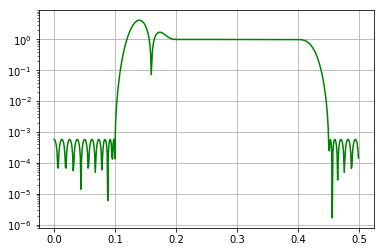

In [1]:
from scipy.signal import freqz, remez
from matplotlib import pyplot as plt
import numpy as np

#Filter with passband 0.2-0.4hz, stopband 0-0.1Hz and 0.45-0.5Hz

bpass = remez(72,[0,0.1,0.2,0.4,0.45,0.5],[0,1,0])
freq, response = freqz(bpass)
amp = abs(response)

plt.semilogy(freq/(2*np.pi),amp,'g-')
plt.grid()
plt.show()
   


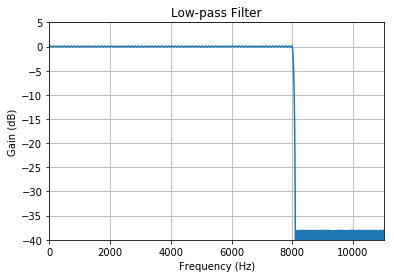

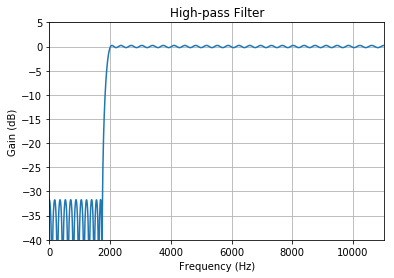

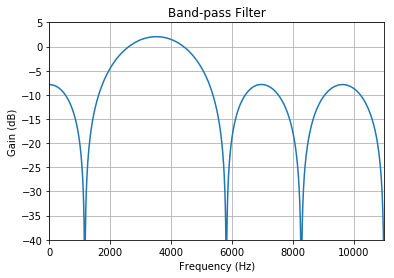

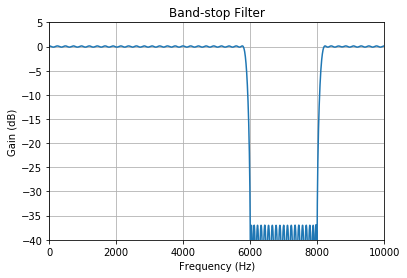

In [7]:
from scipy import signal
import matplotlib.pyplot as plt


# Function to plot various resoponses 
def plot_response(fs, w, h, title):
     "Utility function to plot response functions"
     fig = plt.figure()
     ax = fig.add_subplot(111)
     ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
     ax.set_ylim(-40, 5)
     ax.set_xlim(0, 0.5*fs)
     ax.grid(True)
     ax.set_xlabel('Frequency (Hz)')
     ax.set_ylabel('Gain (dB)')
     ax.set_title(title)



fs = 22050.0       # Sample rate, Hz
cutoff = 8000.0    # Desired cutoff frequency, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 400      # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Low-pass Filter")



fs = 22050.0       # Sample rate, Hz
cutoff = 2000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5*fs],[0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "High-pass Filter")


fs = 22000.0         # Sample rate, Hz
band = [2000, 5000]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass band to stop band, Hz
numtaps = 10        # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-pass Filter")

fs = 20000.0         # Sample rate, Hz
band = [6000, 8000]  # Desired stop band, Hz
trans_width = 200    # Width of transition from pass band to stop band, Hz
numtaps = 175        # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [1, 0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-stop Filter")
plt.show()

##### Forward-backward filtering



Forwardbackward ltering is a common tool in off-line Filtering. Filtering
First Forwards and then backwards and the other way around do not give the
same result generally Here we propose a method to choose the initial state in
the lter to eliminate this discrepancy.The objectives are to obtain uniqueness
and to remove transients in both ends. We have an inbuilt function for the same . *filtfilt* under Scipy library which we have been using



*scipy.signal.filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)*

This function will Apply a digital filter forward and backward to a signal.So this  function applies a linear digital filter twice, once forward and once backwards. The combined filter has zero phase and a filter order twice that of the original.
It provides options for handling the edges of the signal.The function sosfiltfilt  should be preferred over filtfilt for most filtering tasks, as second-order sections have fewer numerical problems.


- b- The numerator coefficient vector of the filter.

- a- The denominator coefficient vector of the filter. If a[0] is not 1, then both a and b are normalized by a[0].

- x- The array of data to be filtered.


When method is “pad”, the function pads the data along the given axis in one of three ways: odd, even or constant. The odd and even extensions have the corresponding symmetry about the end point of the data. The constant extension extends the data with the values at the end points. On both the forward and backward passes, the initial condition of the filter is found by using lfilter_zi and scaling it by the end point of the extended data. When method is “gust”, Gustafsson’s method  is used. Initial conditions are chosen for the forward and backward passes so that the forward-backward filter gives the same result as the backward-forward filter.


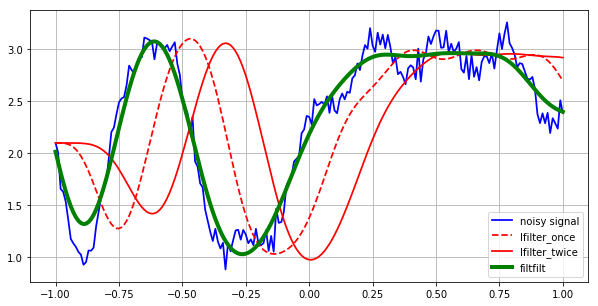

In [5]:
from numpy import sin,cos,pi, linspace
from numpy.random import randn
from scipy.signal import lfilter,lfilter_zi,filtfilt,butter

from matplotlib.pyplot import plot,legend,grid,figure,show

#Generate a noisy signal to be filtered

t = linspace(-1,1,201)

x1 = sin(2*pi*0.75*t*(1-t))
x2 = 2.1 + 0.1*sin(2*pi*1.25*t+1)
x3 = 0.18*cos(2*pi*3.85*t)

x = x1+x2+x3
xn = x +randn(len(t))*0.08

b, a = butter(3,0.05)

zi = lfilter_zi(b,a)
z,_ = lfilter(b,a,xn,zi=zi*xn[0])

z2,_ = lfilter(b,a,z,zi=zi*z[0])

y = filtfilt(b,a,xn)


figure(figsize=(10,5))
plot(t,xn,'b',linewidth=1.75)
plot(t,z,'r--',linewidth=1.75)
plot(t,z2,'r',linewidth=1.75)
plot(t,y,'g',linewidth=4)

legend(('noisy signal','lfilter_once','lfilter_twice','filtfilt'),loc='best')


grid()
show()

As you can see here each time we used the lfilter function there is significant amount of change in phase of the given signal . But where as when we use the forward backward filtering then we have almost no phase change .